# MTH9879 Homework 8

Assigned: April 5, 2016.
Due: April 19, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

# Biya Wu

### 0. (0 points) 
Read Section 6.7 of Bouchaud, Farmer and Lillo.

## Predictability of order flow

### 1. (6 points)

Suppose that the distribution of meta order sizes $Q$ is exponential so that

$$
\Pr(Q>V)= \frac{1}{\lambda}\,e^{-\lambda\,V}
$$

Assuming slices of  constant size $\bar v$, compute the conditional probability that a hidden order has more slices given that $n$ slices have already been observed.  Compare your result with the case where distribution of metaorder size is power-law.

#### Answer

$\Pr(N \geq n+1|N \geq n) = \frac{\Pr(N \geq n+1)}{\Pr(N \geq n)} =\frac{\Pr(Q \geq (n+1)\bar v)}{\Pr(Q \geq n \bar v)} = e^{-\lambda \bar v}$<br\>
The difference lies in their seperated trend with given slice number. The exponential distribution gives us a constant conditional probability while power-law delivers one increasing on given slice number.

## Price manipulation

### 2. (10 points)

Consider the price process

$$
S_t=S_0+\int_0^t\,f(\dot{x}_s)\,G(t-s)\,ds+\int_0^t\,\sigma\,dZ_s
$$

where ${\dot x}_s$ is the rate of trading in dollars at time $s < t$, $f(\dot{x}_s)$ represents the impact of trading at time $s$ and $G(t-s)$ is a decay factor.

(a) With the choices

$$
f(v)=\sqrt{v},\quad G(\tau)=\frac{1}{1+\tau},
$$
    
repeat the computations in Lecture 8  to derive an expression for the expected cost of accumulating shares at the rate $v_1$ and liquidating them at the rate $v_2$.


#### Answer

$$C[\Pi]=\int_0^T\,{\dot x}_t\,dt\,\int_0^t\,f\left({\dot x}_s\right)\,G(t-s)\,ds = C_{11}+C_{22}-C_{12}$$ 
and $$
\begin{eqnarray}
\theta&=& \frac{v_2}{v_1+v_2}\\ 
C_{11}&=&v_1\,f\left(v_1\right)\,\int_0^{\theta\,T}\,dt\,\int_0^t\,G(t-s)\,ds \\ 
&=&v_1\,f\left(v_1\right)\, \int_0^{\theta\,T}\,ln(1+t)\,dt \\
&=& v_1\,\sqrt{v_1} \, [(1+\theta T)\, \ln(1+\theta T) - \theta T]\\
C_{22}&=&v_2\,f\left(v_2\right)\,\int_{\theta\,T}^T\,dt\,\int_{\theta\,T}^t\,G(t-s)\,ds\\ 
&=& v_2\,f\left(v_2\right)\,\int_{\theta\,T}^T \,ln(1+t-\theta T)\,dt\\
&=& v_2\,\sqrt{v_2}\,[(1+(1-\theta) T)\, \ln(1+(1-\theta) T) - (1-\theta) T] \\
C_{12}&=&v_2\,f\left(v_1\right)\,\int_{\theta\,T}^T\,dt\,\int_0^{\theta\,T}\,G(t-s)\,ds\\ &=& v_2\,f\left(v_1\right)\,\int_{\theta\,T}^T\,[\ln(1+t)-\ln(1+t-\theta T)]\,dt\\ 
&=& v_2\,\sqrt{v_1}\,[(1+T)\ln(1+T)-(1+\theta T)\ln(1+\theta T)－(1+(1-\theta) T) \ln(1+(1-\theta) T)]\\
\end{eqnarray}
$$



(b) Verify that with $T=1$, $v_1=1/4$, $v_2=1$, the expected cost of this round-trip strategy is negative, thus demonstrating that price manipulation is possible. (Recall from the lecture slides that price manipulation is always possible if $f(\cdot)$ is nonlinear and the decay kernel $G(\cdot)$  is finite at the origin.)

Hint: You might consider using Mathematica or Wolfram Alpha to do the integrations.

In [1]:
T<-1
v1<-1/4
v2<-1
theta <- v2/(v1+v2)

C11<-v1*sqrt(v1)*integrate(function(x){return (log(1+x))},0,theta*T)$value
C22<-v2*sqrt(v2)*integrate(function(x){return (log(1+x-theta*T))},theta*T,T)$value
C12<-v2*sqrt(v1)*integrate(function(x){return (log(1+x)-log(1+x-theta*T))},theta*T,T)$value

cat('the expected cost of this round-trip strategy: ',C11+C22-C12)

the expected cost of this round-trip strategy:  -0.00370838

## The Obizhaeva-Wang model

### 3. (8 points)

In the Obizhaeva Wang (OW) model, the price follows

$$
S_t=S_0+\eta\,\int_0^t\,{\dot x}_s\,e^{-\rho\,(t-s)}\,ds+\int_0^t\,\sigma\,dZ_s
$$

(a) Derive an expression for the expected price path corresponding to a VWAP execution.


#### Answer

if $t<T\quad$ then $ \E[S_t]=S_0+\eta\,\int_0^t\,{\dot x}_s\,e^{-\rho\,(t-s)}\,ds = S_0+\eta\,v\int_0^t\,e^{-\rho\,(t-s)}\,ds=S_0+\frac{\eta v}{\rho}(1-e^{-\rho t})$ <br\>
else if $t>T\quad$ then $ \E[S_t]=S_0+\eta\,\int_0^T\,{\dot x}_s\,e^{-\rho\,(t-s)}\,ds = S_0+\eta\,v\int_0^T\,e^{-\rho\,(t-s)}\,ds=S_0+\frac{\eta v}{\rho}\left(e^{-\rho (t-T)}-e^{-\rho t}\right)
$


(b) With the duration $T$ of the meta order set to 1, plot the expected price path from time $t=0$ to time $t=2$ for $\rho=0.5,1,$ and $2$.


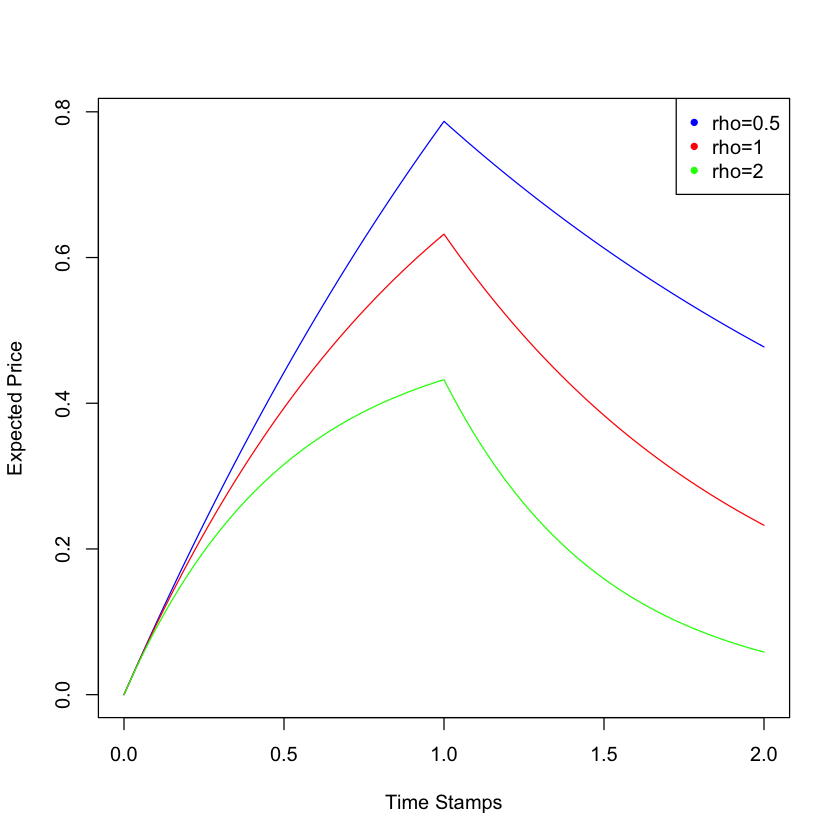

In [3]:
ts<-seq(0,2,0.01)
St<-function(t,rho){ if(t<=1) {return ((1-exp(-rho*t))/rho)} else {return ((exp(-rho*(t-1))-exp(-rho*t))/rho)}}
p1<-sapply(ts,St,rho=0.5)
p2<-sapply(ts,St,rho=1)
p3<-sapply(ts,St,rho=2)
plot(ts,p1,type='l',xlab='Time Stamps',ylab='Expected Price',col='blue')
lines(ts,p2,col='red')
lines(ts,p3,col='green')
legend("topright", c('rho=0.5','rho=1','rho=2'),col=c("blue","red","green"),pch=20)


(c) What is the expected average cost per share $\bar S_T$ of a VWAP order in the OW model?

#### Answer

$C= \int_0^T\,{\dot x}_t\,(\E[S_t]-S_0)\,dt= \int_0^T \frac{\eta v^2}{\rho}\left(1-e^{-\rho t}\right)\,dt=\frac{\eta v^2}{\rho}(T+\frac{e^{-\rho T}-1}{\rho }) = \frac{\eta n^2}{\rho T^2}(T+\frac{e^{-\rho T}-1}{\rho })$ <br\>
So the average cost is $\frac C n = \frac{\eta n}{\rho T^2}(T+\frac{e^{-\rho T}-1}{\rho })$